# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('county_health_income.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 5
  GEOID median_income State   County  UnhealthyDaysMonth
  <chr>         <dbl> <chr>   <chr>                <dbl>
1 01001         68315 Alabama Autauga               4.30
2 01003         71039 Alabama Baldwin               3.88
3 01005         39712 Alabama Barbour               5.43
4 01007         50669 Alabama Bibb                  5.06


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [5]:
%%R 

# Summary income statistics by state
state_income_summary <- df %>%
  group_by(State) %>%
  summarize(
    mean_income = mean(median_income, na.rm = TRUE),
    median_income = median(median_income, na.rm = TRUE),
    min_income = min(median_income, na.rm = TRUE),
    max_income = max(median_income, na.rm = TRUE),
    sd_income = sd(median_income, na.rm = TRUE)
  )

print(state_income_summary)

# A tibble: 52 × 6
   State               mean_income median_income min_income max_income sd_income
   <chr>                     <dbl>         <dbl>      <dbl>      <dbl>     <dbl>
 1 Alabama                  51690.        49879      49879      49879         NA
 2 Alaska                   76688.        77736.     77736.     77736.        NA
 3 Arizona                  59726.        58421      58421      58421         NA
 4 Arkansas                 49542.        48129      48129      48129         NA
 5 California               82967.        76148.     76148.     76148.        NA
 6 Colorado                 70543.        65976.     65976.     65976.        NA
 7 Connecticut              89776.        83617      83617      83617         NA
 8 Delaware                 76664.        75406      75406      75406         NA
 9 District of Columb…     101722        101722     101722     101722         NA
10 Florida                  61786.        62164      62164      62164         NA
# ℹ 42 mo

In [6]:
%%R
# Summary health statistics by state
state_health_summary <- df %>%
  group_by(State) %>%
  summarize(
    # Unhealthy days statistics
    mean_unhealthy_days = mean(UnhealthyDaysMonth, na.rm = TRUE),
    median_unhealthy_days = median(UnhealthyDaysMonth, na.rm = TRUE),
    min_unhealthy_days = min(UnhealthyDaysMonth, na.rm = TRUE),
    max_unhealthy_days = max(UnhealthyDaysMonth, na.rm = TRUE),
    sd_unhealthy_days = sd(UnhealthyDaysMonth, na.rm = TRUE),
    county_count = n()
  )

print(state_health_summary)

# A tibble: 52 × 7
   State            mean_unhealthy_days median_unhealthy_days min_unhealthy_days
   <chr>                          <dbl>                 <dbl>              <dbl>
 1 Alabama                         4.91                  4.96               3.62
 2 Alaska                          4.66                  4.36               3.81
 3 Arizona                         5.07                  5.02               4.13
 4 Arkansas                        5.42                  5.43               4.39
 5 California                      4.60                  4.60               3.42
 6 Colorado                        4.15                  4.12               2.93
 7 Connecticut                     4.01                  4.00               3.44
 8 Delaware                        3.79                  3.71               3.60
 9 District of Col…                3.14                  3.14               3.14
10 Florida                         4.48                  4.32               3.33
# ℹ 42 mo

In addition: Warning message:
There were 2 warnings in `summarize()`.
The first warning was:
ℹ In argument: `min_unhealthy_days = min(UnhealthyDaysMonth, na.rm = TRUE)`.
ℹ In group 52: `State = NA`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning. 


In [7]:
%%R

# I do not have any discrete variables other than county and state name so I will create them by defining brackets 
# Create income and health category brackets first
df_with_categories <- df %>%
  mutate(
    income_category = case_when(
      median_income < 0.75*77540 ~ "Low Income",
      median_income < 1.25*77540 ~ "Medium Income",
      TRUE ~ "High Income"
    ),
    health_category = case_when(
      UnhealthyDaysMonth < 3.5 ~ "Good Health",
      UnhealthyDaysMonth < 5 ~ "Average Health",
      TRUE ~ "Poor Health"
    )
  )

discrete_variables <- c('State', 'income_category', 'health_category')

df_with_categories %>% 
    select(discrete_variables) %>%
    pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
    group_by(variable, value) %>% 
    summarize(
        count = n()
    )

df_with_categories %>% 
  select(median_income, State, County, income_category, health_category) %>%
  print(n = Inf)

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.
# A tibble: 3,222 × 5
     median_income State                County   income_category health_category
             <dbl> <chr>                <chr>    <chr>           <chr>          
   1         68315 Alabama              Autauga  Medium Income   Average Health 
   2         71039 Alabama              Baldwin  Medium Income   Average Health 
   3         39712 Alabama              Barbour  Low Income      Poor Health    
   4         50669 Alabama              Bibb     Low Income      Poor Health    
   5         57440 Alabama              Blount   Low Income      Average Health 
   6         36136 Alabama              Bullock  Low Income      Poor Health    
   7         44429 Alabama              Butler   Low Income      Poor Health    
   8         54339 Alabama              Calhoun  Low Income      Average Health 
   9         48805 Alabama              Chambers Low Income      Average 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



## 1-D visualizations (aka distributions)


### Histogram for median income

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 1 row containing non-finite outside the scale range (`stat_bin()`). 



In addition: Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


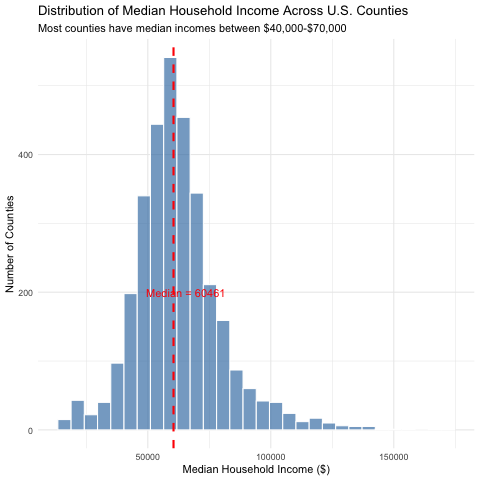

In [8]:
%%R
ggplot(df, aes(x = median_income)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white", alpha = 0.7) +
  geom_vline(aes(xintercept = median(median_income, na.rm = TRUE)), 
             color = "red", linetype = "dashed", size = 1) +
  labs(
    title = "Distribution of Median Household Income Across U.S. Counties",
    subtitle = "Most counties have median incomes between $40,000-$70,000",
    x = "Median Household Income ($)",
    y = "Number of Counties"
  ) +
  theme_minimal() +
  annotate("text", 
           x = median(df$median_income, na.rm = TRUE) + 5000, 
           y = 200, 
           label = paste("Median =", round(median(df$median_income, na.rm = TRUE), 0)), 
           color = "red")

### Histogram for unhealthy days

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 78 rows containing non-finite outside the scale range
(`stat_boxplot()`). 



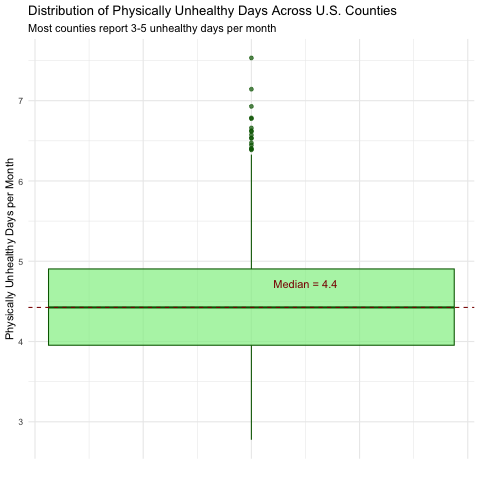

In [9]:
%%R
ggplot(df, aes(y = UnhealthyDaysMonth, x = 1)) +
  geom_boxplot(fill = "lightgreen", color = "darkgreen", alpha = 0.7) +
  labs(
    title = "Distribution of Physically Unhealthy Days Across U.S. Counties",
    subtitle = "Most counties report 3-5 unhealthy days per month",
    y = "Physically Unhealthy Days per Month",
    x = ""
  ) +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank()) +
  geom_hline(aes(yintercept = median(UnhealthyDaysMonth, na.rm = TRUE)), 
             color = "darkred", linetype = "dashed") +
  annotate("text", 
           x = 1.1, 
           y = median(df$UnhealthyDaysMonth, na.rm = TRUE) + 0.3, 
           label = paste("Median =", round(median(df$UnhealthyDaysMonth, na.rm = TRUE), 1)), 
           color = "darkred")

### Discrete Variables

Visualizations for income and health categories as per brackets defined above

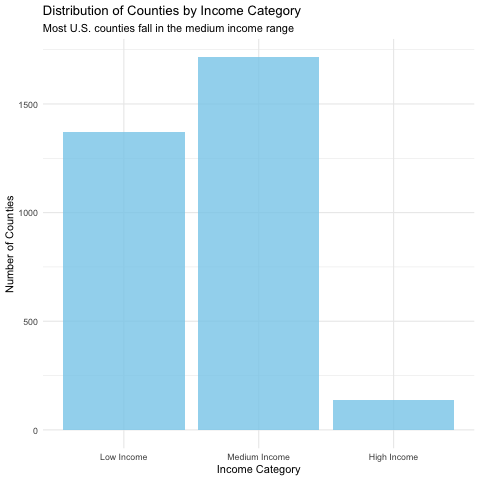

In [10]:
%%R
# Make sure we have the categories defined
df_with_categories <- df %>%
  mutate(
    income_category = case_when(
      median_income < 0.75*77540 ~ "Low Income",
      median_income < 1.25*77540 ~ "Medium Income",
      TRUE ~ "High Income"
    ),
    health_category = case_when(
      UnhealthyDaysMonth < 3.5 ~ "Good Health",
      UnhealthyDaysMonth < 5 ~ "Average Health",
      TRUE ~ "Poor Health"
    )
  )

# Bar chart of income categories
ggplot(df_with_categories, aes(x = income_category)) +
  geom_bar(fill = "skyblue", alpha = 0.8) +
  labs(
    title = "Distribution of Counties by Income Category",
    subtitle = "Most U.S. counties fall in the medium income range",
    x = "Income Category",
    y = "Number of Counties"
  ) +
  theme_minimal() +
  scale_x_discrete(limits = c("Low Income", "Medium Income", "High Income"))

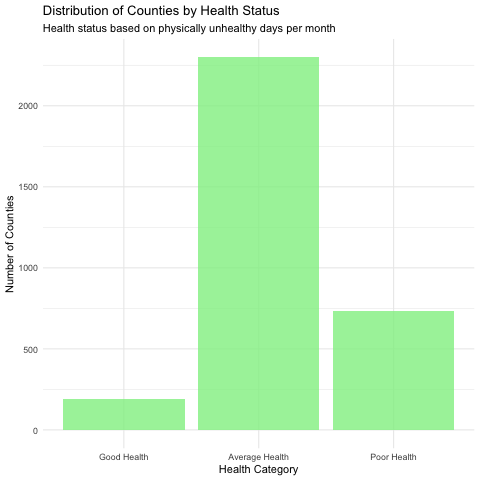

In [11]:
%%R
# Bar chart of health categories
ggplot(df_with_categories, aes(x = health_category)) +
  geom_bar(fill = "lightgreen", alpha = 0.8) +
  labs(
    title = "Distribution of Counties by Health Status",
    subtitle = "Health status based on physically unhealthy days per month",
    x = "Health Category",
    y = "Number of Counties"
  ) +
  theme_minimal() +
  scale_x_discrete(limits = c("Good Health", "Average Health", "Poor Health"))
